In [23]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

# {{ exercise }} Optimization and Regularization in pytroch

In this exercise, you will use the pytorch library to perform polynomial regression (of $n^{th}$-order) on different types of data.
While we have already seen in earlier exercises that polynomial regression is a linear problem that can be optimized with least squares. In this exercerise, however, we will use the iterative gradient descent optimization, where the parameters are iteratively adjusted in the negative direction of the gradient. 

$$\theta_{t+1} = \theta_t-\gamma\nabla_{\theta_t}\mathcal{L}$$
where $\theta$ is the trainable weight of the model, $t$ is the current number of training steps, $\mathcal{L}$ is the loss, and $\gamma$ is the learning rate. 
\
The primary loss function throughout the exercise will be the mean squared error (MSE),
$$MSE = \sum_i^n (y_i-\hat{y}_i)^2,$$
$\hat{y}_i$ is the predicted value and $y_i$ is the target value. 

We will optimize the polynomial model
$$f(x) = \theta_0+ \theta_1\text{x}+\theta_2\text{x}^2 + \theta_3\text{x}^3 + \ldots + \theta_n\text{x}^n$$
due to its simplicity and how easy it is to interpret. 

The primary focus of the exercise is to implement both Ridge and Lasso regularization into the optimization rutine and test how they affect the perfomance of the model. 
Both Ridge and Lasso regularization involves adding a second term to the loss function that pushishes large values of the training parameters. 

Rigde:

$$\mathcal{L} = MSE + \lambda\sum_{i=0}^{n}\theta_i^2$$

Lasso:

$$\mathcal{L} = MSE + \lambda\sum_{i=0}^{n}|\theta_i|$$

where $\lambda$ is the regularization constrant which determine the importance of the regularization term.

## Task (A) 
In the cell below you are given the implementation and training rutine of the of the polynomial model using the pytorch library.
\
<i class="fas fa-code"></i> Read through the given code and comments, such thay you understand the model implementation and optimization process. 


<i class="fas fa-code"></i> Make the function `L1_reg(model,LAMBDA_L2)` which takes the model and $\lambda$ and return the value of the L2 (ridge) regularization term, see formula above. 

```{tip}
Iterate over `model.parameters()` and use the method `torch.norm(weights, order)` to implement the regularizing terms in the loss function.
```

<i class="fas fa-code"></i> Make the function `L1_reg(model,LAMBDA_L1)` which is identical to `L2_reg` but this time the L1 term is calculated and returned as output.


In [2]:
# Create Tensors to hold input and outputs
### different data to train/fit you polynomial to
#x = torch.linspace(-math.pi, math.pi, 2000)
#y = torch.sin(x)
### 
x =torch.linspace(-4, 4, 800)
y = 0.2*x**3+0.8*x**2+2.5*x -1.0
n= 5

# PLACEHOLDER <<
# def L1_reg(model,LAMBDA_L1):
#      pass

# def L2_reg(model,LAMBDA_L2):
#      pass
# >>

def poly_model(x,y,n,iterations, learning_rate,lambda_reg=0.0): 

    p = torch.tensor(np.arange(1,n+1))
    xx = x.unsqueeze(-1).pow(p)

    ## Splitting of test and training data
    X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.5, random_state=42)

    # In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
    # (n,), for this case, broadcasting semantics will apply to obtain a tensor
    # of shape (2000, n)

    # Normalize input
    X_train = X_train/X_train.max(axis=0).values
    X_test = X_test/X_test.max(axis=0).values

    # Use the nn package to define our model as a sequence of layers. nn.Sequential
    # is a Module which contains other Modules, and applies them in sequence to
    # produce its output. The Linear Module computes output from input using a
    # linear function, and holds internal Tensors for its weight and bias.
    # The Flatten layer flatens the output of the linear layer to a 1D tensor,
    # to match the shape of `y`.
    model = torch.nn.Sequential(
        torch.nn.Linear(n, 1),
        torch.nn.Flatten(0, 1)
    )

    #model[0].weight[:,5:].data.fill_(torch.randn(1)[0]/1000)
    # The nn package also contains definitions of popular loss functions; in this
    # case we will use Mean Squared Error (MSE) as our loss function.
    loss_fn = torch.nn.MSELoss(reduction='mean')
    
    for t in range(iterations):

        # Forward pass: compute predicted y by passing x to the model. Module objects
        # override the __call__ operator so you can call them like functions. When
        # doing so you pass a Tensor of input data to the Module and it produces
        # a Tensor of output data.
        y_pred_train = model(X_train)
        y_pred_test = model(X_test)

        # Compute and print loss. We pass Tensors containing the predicted and target
        # values of y, and the loss function returns a Tensor containing the
        # loss.
        # PLACEHOLDER <<
        # loss = loss_fn(y_pred_train, y_train) ### add regularization term(s) here!!
        # >>
        loss_mse = loss_fn(y_pred_test, y_test).item()
        if t % (iterations/20) ==99:
            print(f'iteration: {t:4},lambda-value: {lambda_reg:4.4f}, training loss:  {loss.item():4.5f}, MSE test data: {loss_mse:4.5f}') #print the test MSE and training loss for certain iterations. 


        # Zero the gradients before running the backward pass.
        model.zero_grad()

        # Backward pass: compute gradient of the loss with respect to all the learnable
        # parameters of the model. Internally, the parameters of each Module are stored
        # in Tensors with requires_grad=True, so this call will compute gradients for
        # all learnable parameters in the model.
        loss.backward()

        # Update the weights using gradient descent. Each parameter is a Tensor, so
        # we can access its gradients like we did before.
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
    return model, xx

# PLACEHOLDER <<
# ###====####
# # copy code here
# ###====#### 
# >>

### hyper parameters  
learning_rate = 1e-2
lambda_reg = 0.00
iterations = 20000
model , xx = poly_model(x, y, n, iterations, learning_rate, lambda_reg)


iteration:   99,lambda-value: 0.0000, training loss:  19.01833, MSE test data: 18.58396
iteration: 1099,lambda-value: 0.0000, training loss:  0.27186, MSE test data: 0.26326
iteration: 2099,lambda-value: 0.0000, training loss:  0.21607, MSE test data: 0.20679
iteration: 3099,lambda-value: 0.0000, training loss:  0.19192, MSE test data: 0.18347
iteration: 4099,lambda-value: 0.0000, training loss:  0.17117, MSE test data: 0.16371
iteration: 5099,lambda-value: 0.0000, training loss:  0.15303, MSE test data: 0.14656
iteration: 6099,lambda-value: 0.0000, training loss:  0.13711, MSE test data: 0.13159
iteration: 7099,lambda-value: 0.0000, training loss:  0.12311, MSE test data: 0.11847
iteration: 8099,lambda-value: 0.0000, training loss:  0.11079, MSE test data: 0.10695
iteration: 9099,lambda-value: 0.0000, training loss:  0.09994, MSE test data: 0.09683
iteration: 10099,lambda-value: 0.0000, training loss:  0.09038, MSE test data: 0.08793
iteration: 11099,lambda-value: 0.0000, training los

## Questions
<i class="fas fa-question"></i> How does the test `loss_mse` perform different order of the polynomial. 

<i class="fas fa-code"></i> Add the regularizing term from `L2_reg` to the `loss` variable in the code. 

<i class="fas fa-question "></i> Cosider the `loss_mse` for different values of $\lambda$ (the regularization constant/ `lambda_reg` variable), does adding Ridge regularization improve the model performance on the test data?
<i class="fas fa-code"></i> Add the regularizing term from `L1_reg` to the `loss` variable in the code.  

<i class="fas fa-question "></i> Cosider the `loss_mse` for different values of $\lambda$ (the regularization constant/ `lambda_reg` variable), does adding Lasso regularization improve the model performance on the test data?

<i class="fas fa-question "></i> Why is regularization not useful in this case?

The code in the cell below plots the model predicted values $\hat{y_i}$ and target values $y_i$.

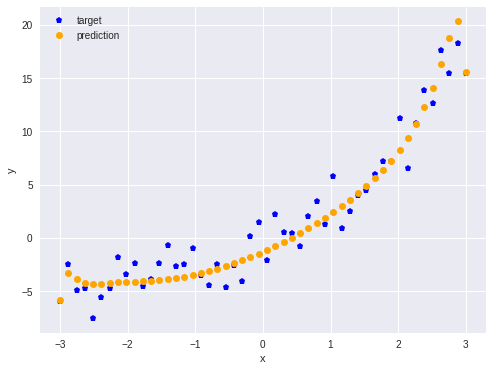

In [24]:
### plotting the data and predictions to visualize model performance
pred = model(xx/xx.max(axis=0).values)
fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'p',color='blue',label='target')
plt.plot(x,pred.detach(),'o',color='orange',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<i class="fas fa-question "></i> What happens with the predictions in the plot above when you increase the regularization constant $\lambda$?

# Task (B)
Now we consider a new dataset where statistical noise is added. Use `Poly_model()` from the cell above to answer the following tasks/questions:

<i class="fas fa-code"></i> Start by having training a $9^{th}$-order polynomial model, how is (for both Rigde and Lasso regularization) `loss_mse` affefected by slowly by increasing the `lambda_reg`? 

<i class="fas fa-code"></i> Find any difference in results between Rigde and Lasso regulatization? `hint` try setting `$n$` to a much higher number (eg. 50).

<i class="fas fa-code"></i> Increase `N_points` to 5000 ($n=9$ again) is ridge and/or lasso regularization still worth doing? (argue why/ why not)

<i class="fas fa-question"></i> Consider, how how you would find the value for `lambda_reg` which results in the lowest test MSE (`loss_mse`)? Instead of just trying different values manually.


In [25]:

# Create Tensors to hold input and outputs
### different data to train/fit you polynomial to
### 
N_points = 50
x =torch.linspace(-3, 3, N_points)
y = 0.2*x**3+0.8*x**2+2.5*x -1.0
### add random noise
noise = torch.randn(y.size())*2 + 0
y = y + noise
n = 50 ## order of polynomial fit

learning_rate = 1e-2
lambda_reg = 0.0
iterations = 20000
model , xx = poly_model(x,y,n,iterations, learning_rate,lambda_reg)

iteration:   99,lambda-value: 0.0000, training loss:  9.99606, MSE test data: 16.25507
iteration: 1099,lambda-value: 0.0000, training loss:  2.78073, MSE test data: 3.53777
iteration: 2099,lambda-value: 0.0000, training loss:  2.70329, MSE test data: 3.45632
iteration: 3099,lambda-value: 0.0000, training loss:  2.68458, MSE test data: 3.52205
iteration: 4099,lambda-value: 0.0000, training loss:  2.66978, MSE test data: 3.60648
iteration: 5099,lambda-value: 0.0000, training loss:  2.65708, MSE test data: 3.69746
iteration: 6099,lambda-value: 0.0000, training loss:  2.64596, MSE test data: 3.79158
iteration: 7099,lambda-value: 0.0000, training loss:  2.63609, MSE test data: 3.88700
iteration: 8099,lambda-value: 0.0000, training loss:  2.62724, MSE test data: 3.98246
iteration: 9099,lambda-value: 0.0000, training loss:  2.61924, MSE test data: 4.07708
iteration: 10099,lambda-value: 0.0000, training loss:  2.61196, MSE test data: 4.17031
iteration: 11099,lambda-value: 0.0000, training loss

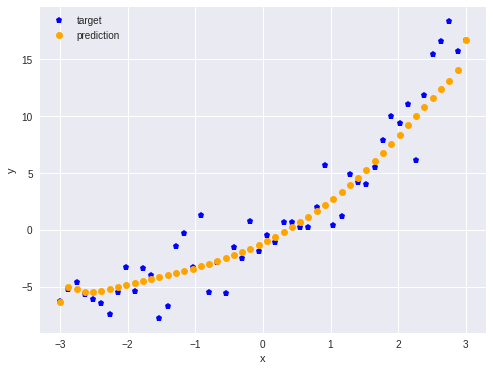

In [26]:
### plotting the data and predictions to visualize model performance
pred = model(xx/xx.max(axis=0).values)
fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'p',color='blue',label='target')
plt.plot(x,pred.detach(),'o',color='orange',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

(51,)


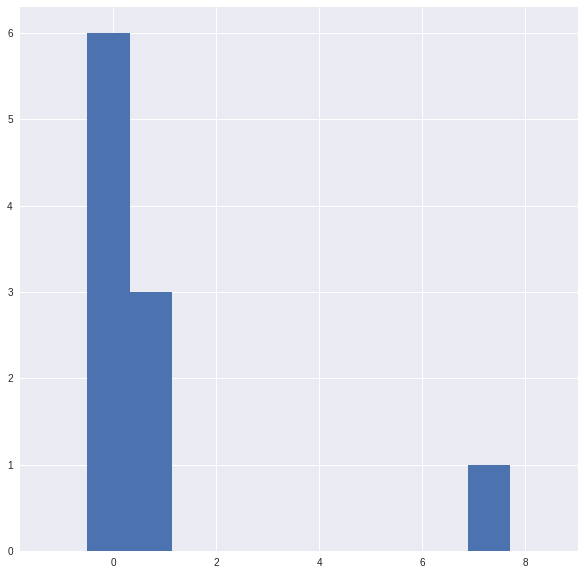

In [34]:
## Plot the weights of the models

# array of the model weights 
weights = torch.cat([x.view(-1) for x in model.parameters()]).detach().numpy()
print(weights.shape)

#### code for histogram of model parameter/weight values here #### 
